In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
df = pd.read_csv('data_assignment.csv')


In [5]:
# Parse column Date to type Date
df['Date'] = df["Date"].replace(to_replace=r'T.*',value='',regex=True)
df['Date'] = pd.to_datetime(df['Date'])


Text(0.5, 0, 'Date')

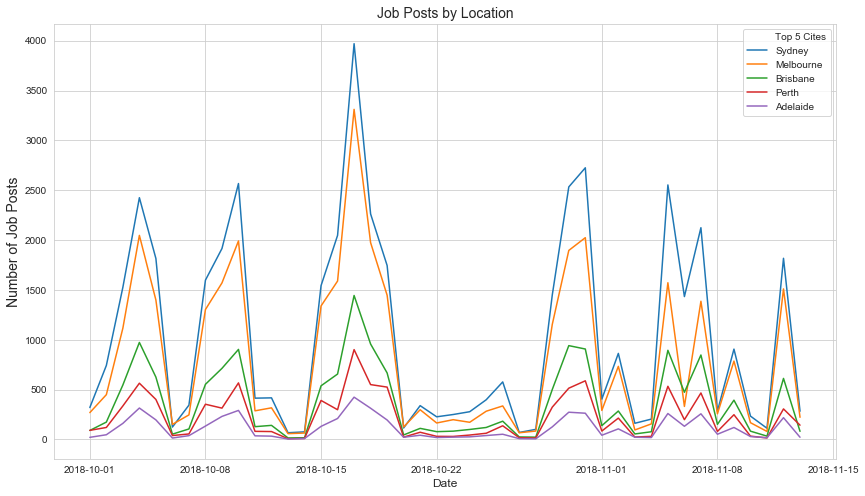

In [4]:
# 2.4 Visualise trending of the job postings for the big cities.* (2 points)

# Filter the dataset by top 5 big cities
df_topcities= df[(df['Location'].isna()==False) & (df['Location'].isin(['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide']).astype(int))]

# Group the dataset by Date and Location, count number of job by date in each location
df_topcities = df_topcities.groupby(['Date','Location']).agg({'Id': ['count']})
df_topcities.columns = ['JobPost']
df_topcities = df_topcities.reset_index()
df_topcities = df_topcities.sort_values(by=["JobPost"], ascending =False)

# Plot the job post for different date and location
sns.set_style("whitegrid")
plt.figure (figsize=(14,8))
ax = sns.lineplot(x="Date", y="JobPost", hue="Location", data=df_topcities)

# Setting x, y, legend and title 
ax.legend().texts[0].set_text("Top 5 Cites")
plt.title('Job Posts by Location',size=14)
plt.ylabel('Number of Job Posts',fontsize=14)
plt.xlabel('Date',fontsize=12)


In [5]:
# 2.5 Based on the above charts, provide your observation about the number of job posts over time. Give your own conclusion.(2 points)
print('This graph prepresents weekly seasonality time-series. Every week, the peak time of job post is in the middle of the week (Wed - Thur) and the lowest job post is at the begining and the end of each week. ')
print('We can use this data to predict the number of job postings for the next 7 days using moving average method.')

This graph prepresents weekly seasonality time-series. Every week, the peak time of job post is in the middle of the week (Wed - Thur) and the lowest job post is at the begining and the end of each week. 
We can use this data to predict the number of job postings for the next 7 days using moving average method.


Text(0.5, 0, 'Date')

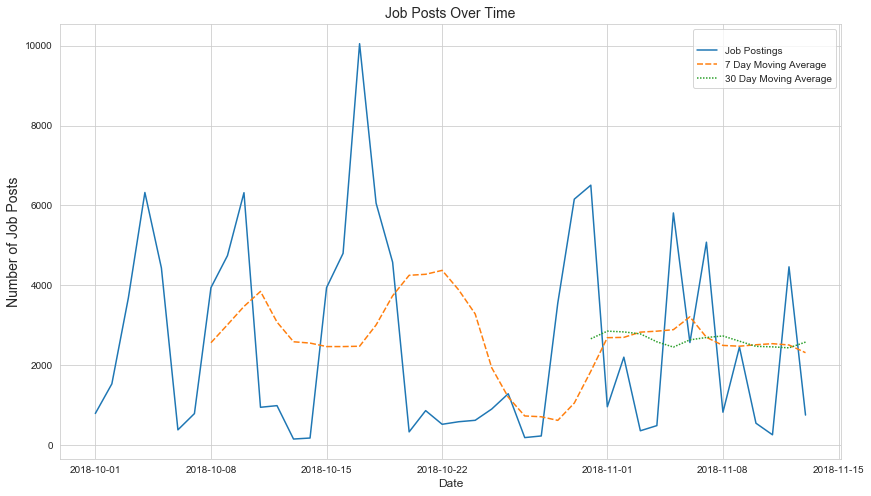

In [7]:
# 3.1 Using moving average for 7 days and 30 days to predict the number of job postings and visualise them in line chart. Which one creates a better prediction? Explain your choice.** (3 points)

import matplotlib.dates as mdates
from datetime import date, timedelta
import calendar

# Filter the dataset by top 5 big cities
df_jobpost= df[(df['Location'].isna()==False) & (df['Location'].isin(['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide']).astype(int))]

# Group job post by date
df_jobpost = df_jobpost.groupby('Date').agg({'Id': ['count']})
df_jobpost.columns = ['JobPost']
df_jobpost = df_jobpost.reset_index()
df_jobpost = df_jobpost.sort_values(by=["Date"], ascending =True)

# Adding a a type column to store the type of data []"Actual", "4 days moving average","30 days moving average"]
df_jobpost['MA'] = "Job Postings"

# Method to return number of different days between two dates
def diff_date(start, end, dtype):
    x = pd.to_datetime(end) - pd.to_datetime(start)
    return int(x / np.timedelta64(1, dtype))


# Using moving average
def moving_average(df, k, from_date, to_date):
    origindf = df.copy()
    moving_average_df = pd.DataFrame(columns=['Date','JobPost'])
    num_df = len(origindf)
    diffDay = diff_date(from_date, to_date, 'D')
    for m in range(diffDay + 1):
        if m < k:
            dt_predict = float('nan')
        else:
            history = origindf['JobPost'][m-k:m]
            dt_predict = history.mean()
        moving_average_df.loc[m] = ['{Date.year}-{Date.month}-{Date.day}'.format(Date = from_date + pd.Timedelta(days=m)), dt_predict]
        if m >= num_df:
            origindf.loc[m]= ['{Date.year}-{Date.month}-{Date.day}'.format(Date =  from_date + pd.Timedelta(days=m)), dt_predict]
    return moving_average_df

# Start and end date of graph
sdate = date(2018, 10, 1)  
edate = date(2018, 11, 13) 

# 7 days moving average
ma_df_7Days = moving_average(df_jobpost, 7, sdate, edate)
ma_df_7Days['MA'] = "7 Day Moving Average"

# 30 days moving average 
ma_df_30Days = moving_average(df_jobpost, 30, sdate, edate)
ma_df_30Days['MA'] = "30 Day Moving Average"

# Combine of actual dataset, 7 days dataset, 30 days dataset
eval_df = pd.concat([df_jobpost,ma_df_7Days, ma_df_30Days], ignore_index=True)

# Convert Date to dateime column
eval_df['Date'] = pd.to_datetime(eval_df['Date'])

# Plot the job post for different date and location
sns.set_style("whitegrid")
plt.figure (figsize=(14,8))
ax = sns.lineplot(x="Date", y="JobPost", hue="MA", style="MA", data=eval_df)
ax.legend().texts[0].set_text("")
plt.title('Job Posts Over Time',size=14)
plt.ylabel('Number of Job Posts',fontsize=14)
plt.xlabel('Date',fontsize=12)


In [32]:
# 3.2 Choose your favourite job sector/sub-sector, then use TF/IDF to extract important keywords. Visualise them in word cloud chart (hint: you can use the online tool https://wordart.com/create or similar websites)**. (3 points)
import sys

# Cleaning data before text normalization 

# Chose "Information & Communication Technology" sector
df_it = df[(df['Classification'] == "Healthcare & Medical") & (df['Location'] == "Adelaide") & (df['FullDescription'].notnull())]
df_it.head()

# This method to remove html tags from a strin
def remove_html_tags(text):
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# Apply remove HTML method to the column FullDescription
df_it['FullDescription'] = df_it['FullDescription'].replace('nbsp', ' ', regex=True)
df_it['FullDescription'] = df_it['FullDescription'].apply(remove_html_tags)
print(df_it )


              Id                                  Title  \
238     37404121  Medical Representative Adelaide South   
239     37404120       Clinical Consultant Ortho/Trauma   
871     37403405  Day Surgery Staff - Various Positions   
883     37403390                             Pharmacist   
907     37403367                       PATHOLOGY COURSE   
...          ...                                    ...   
148002  37683354                Occupational Therapist    
148008  37683266     Physiotherapist / OT - Adelaide SA   
148780  37677728                       Registered Nurse   
149339  37710186  New Graduate Midwife - Relocate to NZ   
149544  37709835                JUNIOR DENTAL ASSISTANT   

                                 Company       Date  Location Area  \
238     EvansPetersen Healthcare Pty Ltd 2018-10-07  Adelaide  NaN   
239     EvansPetersen Healthcare Pty Ltd 2018-10-07  Adelaide  NaN   
871                                  NaN 2018-10-07  Adelaide  NaN   
883        

In [33]:
# Normalize text by stemming, tokenizing, and removing stopwords. 
from __future__ import print_function, division
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('punkt')
import string
from nltk.corpus import stopwords
import math
from collections import Counter
nltk.download('stopwords')
import pprint 
pp = pprint.PrettyPrinter(indent=4)

def normalize(document):
    # TODO: remove punctuation
    text = "".join([ch for ch in document if ch not in string.punctuation]) #and ch not in string.digits])
    
    # TODO: tokenize text
    tokens = nltk.word_tokenize(text)
    
    # TODO: Stemming
    stemmer = PorterStemmer()
    ret = " ".join([stemmer.stem(word.lower()) for word in tokens])
    return ret

original_documents = [x.strip() for x in df_it['FullDescription']] 
documents = [normalize(d).split() for d in original_documents]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
# Implement TF-IDF, including creating the vocabulary, computing term frequency, and normalizing by tf-idf weights

# Flatten all the documents
flat_list = [word for doc in documents for word in doc]

# TODO: remove stop words from the vocabulary
words = [word for word in flat_list if word not in stopwords.words('english')]

# TODO: we take the 500 most common words only
counts = Counter(words)
vocabulary = counts.most_common(500)
print([x for x in vocabulary if x[0] == 'work'])
vocabulary = [x[0] for x in vocabulary]
assert len(vocabulary) == 500

# vocabulary.sort()
vocabulary[:5]
print(vocabulary[:5])

[('work', 1559)]
['work', 'care', 'team', 'servic', 'provid']


In [22]:
def tf(vocabulary, documents):
    matrix = [0] * len(documents)
    for i, document in enumerate(documents):
        counts = Counter(document)
        matrix[i] = [0] * len(vocabulary)
        for j, term in enumerate(vocabulary):
            matrix[i][j] = counts[term]
    return matrix

tf = tf(vocabulary, documents)
np.array(vocabulary)[np.where(np.array(tf[1]) > 0)], np.array(tf[1])[np.where(np.array(tf[1]) > 0)]


(array(['work', 'team', 'servic', 'provid', 'experi', 'thi', 'role',
        'manag', 'skill', 'support', 'nurs', 'clinic', 'opportun',
        'commun', 'includ', 'appli', 'medic', 'pleas', 'profession',
        'join', 'within', 'abil', 'requir', 'excel', 'offer', 'success',
        'train', 'peopl', 'client', 'environ', 'year', 'high', 'ha',
        'base', 'well', 'lead', 'busi', 'healthcar', 'sale', 'knowledg',
        'strong', 'compani', 'salari', 'candid', 'new', 'level', 'call',
        'deliv', 'recruit', 'continu', 'live', 'use', 'industri', 'packag',
        'improv', 'effect', 'relationship', 'market', 'except', 'achiev',
        'leader', 'territori', 'growth', 'confidenti', 'innov', 'state',
        'present', 'respect', 'perform', 'build', 'pharmaceut', 'competit',
        'uniqu', 'cv', 'allow', 'drive', 'theatr', 'technolog', 'due',
        'advic', 'exist', 'result', 'ep', 'advanc', 'place', 'deb', 'two',
        'global', 'highest', 'surgic', 'accur', 'background', 

In [35]:
print(vocabulary)

['work', 'care', 'team', 'servic', 'provid', 'experi', 'role', 'thi', 'health', 'manag', 'skill', 'support', 'nurs', 'clinic', 'opportun', 'commun', 'appli', 'includ', 'applic', 'medic', 'develop', 'practic', 'pleas', 'posit', 'australia', 'patient', 'profession', 'current', 'requir', 'join', 'within', 'abil', 'hospit', 'age', 'excel', 'adelaid', 'time', '’', 'part', 'offer', 'train', 'success', 'flexibl', 'staff', 'avail', 'client', 'peopl', 'custom', 'amp', 'assist', 'organis', 'environ', 'year', 'career', 'ha', 'base', 'high', 'healthcar', 'well', 'need', 'calvari', 'lead', 'busi', 'regist', 'program', 'experienc', 'look', 'qualiti', 'across', 'registr', 'sale', 'hour', 'compani', 'knowledg', 'australian', 'strong', 'salari', 'gener', 'candid', 'seek', 'south', 'assess', 'full', 'job', 'respons', 'benefit', 'new', 'nation', 'level', 'rang', 'highli', 'must', 'ahpra', 'dental', 'person', 'contact', 'ensur', 'certif', 'commit', 'also', 'locat', 'call', 'shift', 'us', 'passion', 'demon

In [37]:
def idf(vocabulary, documents):
    """TODO: compute IDF, storing values in a dictionary"""
    idf = {}
    num_documents = len(documents)
   
    for i, term in enumerate(vocabulary):
        idf[term] = math.log(num_documents / sum(term in document for document in documents), 2)
    return idf

idf = idf(vocabulary, documents)
[idf[key] for key in vocabulary[:5]]

[0.15403362867242096,
 0.7274313777606548,
 0.3595916111456089,
 0.5758602936139037,
 0.44225068596845996]

In [38]:
def vectorize(document, vocabulary, idf):
    vector = [0]*len(vocabulary)
    counts = Counter(document)
    for i,term in enumerate(vocabulary):
        vector[i] = idf[term] * counts[term]
    return vector

document_vectors = [vectorize(s, vocabulary, idf) for s in documents]
np.array(vocabulary)[np.where(np.array(document_vectors[1]) > 0)], np.array(document_vectors[1])[np.where(np.array(document_vectors[1]) > 0)]


(array(['work', 'team', 'servic', 'provid', 'experi', 'role', 'thi',
        'manag', 'skill', 'support', 'nurs', 'clinic', 'opportun',
        'commun', 'appli', 'includ', 'medic', 'pleas', 'profession',
        'requir', 'join', 'within', 'abil', 'excel', 'offer', 'train',
        'success', 'client', 'peopl', 'environ', 'year', 'ha', 'base',
        'high', 'healthcar', 'well', 'lead', 'busi', 'sale', 'compani',
        'knowledg', 'strong', 'salari', 'candid', 'new', 'level', 'call',
        'deliv', 'live', 'continu', 'recruit', 'use', 'discuss',
        'industri', 'packag', 'improv', 'effect', 'market', 'relationship',
        'except', 'achiev', 'leader', 'territori', 'growth', 'confidenti',
        'innov', 'state', 'present', 'build', 'perform', 'respect',
        'pharmaceut', 'competit', 'uniqu', 'cv', 'allow', 'deb',
        'technolog', 'drive', 'due', 'theatr', 'advanc', 'exist', 'advic',
        'ep', 'result', 'place', 'background', 'two', 'global', 'highest',
        

In [43]:
# Get the top 50 common words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english', max_features=500)

features = tfidf.fit(original_documents)
corpus_tf_idf = tfidf.transform(original_documents) 

sum_words = corpus_tf_idf.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
print(sorted(words_freq, key = lambda x: x[1], reverse=True)[:50])
print('work', corpus_tf_idf[1, features.vocabulary_['work']])

[('care', 45.12699748893267), ('work', 33.89604982069765), ('team', 32.71322459103856), ('health', 32.55253693367731), ('experience', 32.37010466321796), ('role', 29.975597115351363), ('practice', 27.23471218434477), ('skills', 27.13973298616586), ('medical', 26.942032135940583), ('services', 24.722740141085485), ('clinical', 23.302694526245688), ('working', 23.29165710633764), ('aged', 23.184835731735383), ('australia', 22.922506762330947), ('apply', 21.900410877856046), ('support', 21.386489890817877), ('management', 21.24564585540942), ('time', 20.647551322854756), ('adelaide', 19.403290720663556), ('amp', 19.2207429210842), ('current', 19.19819746102322), ('opportunity', 18.851368381564825), ('dental', 18.59138428279054), ('ability', 18.557814265392494), ('hospital', 18.47425994251876), ('service', 18.423458720777493), ('provide', 18.062693012088857), ('staff', 17.946893836864135), ('position', 17.030353774087995), ('available', 16.950199745658608), ('join', 16.90661748133198), ('h

In [42]:
# Apply TF-IDF for information retrieval
def cosine_similarity(v1,v2):
    """TODO: compute cosine similarity"""
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range (len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    if sumxy == 0:
        result = 0
    else:
        result = sumxy/math.sqrt(sumxx*sumyy)
    return result

def search_vec(query, k, vocabulary, stemmer, document_vectors, original_documents):
    q = query.split()
    q = [stemmer.stem(w) for w in q]
    query_vector = vectorize(q, vocabulary, idf)
    
    # TODO: rank the documents by cosine similarity
    scores = [[cosine_similarity(query_vector, document_vectors[d]),d] for d in range(len(document_vectors))]
    scores.sort(key=lambda x: -x[0])
    
    print('Top-{0} documents'.format(k))
    for i in range(k):
        print("********************------ " + repr(i+1) + " -------********************")
        print(repr(i+1) + ") ", original_documents[scores[i][1]])

query = "team recuit"
stemmer = PorterStemmer()
#search_vec(query, 5, vocabulary, stemmer, document_vectors, original_documents)
